### scikit-learn 中的多项式回归和Pipeline

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
x = np.random.uniform(-3, 3, size=100)
X= x.reshape(-1, 1)

In [4]:
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

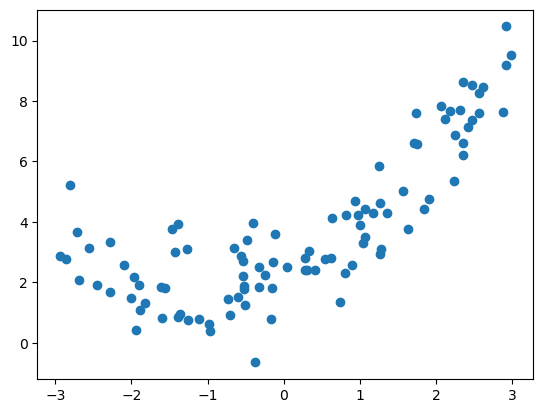

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures


In [7]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [8]:
X2.shape

(100, 3)

In [9]:
X2[:5,:]

array([[1.        , 2.91864234, 8.51847308],
       [1.        , 2.35505859, 5.54630095],
       [1.        , 2.23669825, 5.00281906],
       [1.        , 1.73536996, 3.01150891],
       [1.        , 1.74527518, 3.04598546]])

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

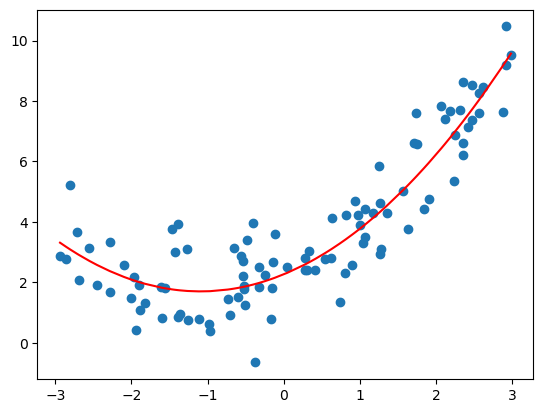

In [11]:

y_predict2 = lin_reg2.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color = 'r')
plt.show()

In [12]:
lin_reg2.coef_

array([0.        , 1.03476631, 0.47356812])

In [13]:
lin_reg2.intercept_

2.2639952380324306

### 关于PolynomialFeatures

In [14]:
X= np.arange(1, 11).reshape(-1,2)

In [17]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X2 = poly.transform(X)

In [18]:
X2

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

### pipeline

In [19]:
x = np.random.uniform(-3, 3, size=100)
X= x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
poly_reg = Pipeline([
  ('poly', PolynomialFeatures(degree=2)),
  ('std_scaler', StandardScaler()),
  ('lin_reg', LinearRegression())
])

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

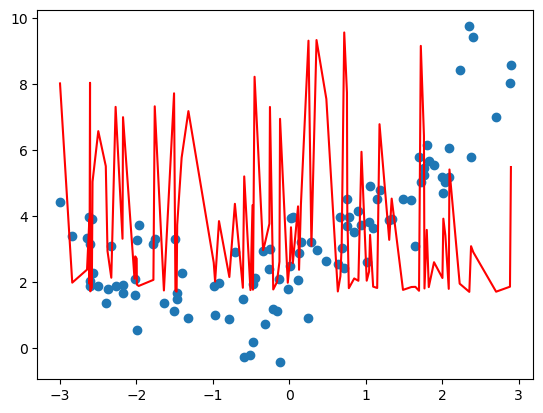

In [21]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color = 'r')
plt.show()